In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
df_new=pd.read_excel("Encoded Global Superstore data 2018.xlsx")

In [3]:
df_new.head()

,Unnamed: 0,Sales,Quantity,Discount,Profit,Shipping Cost,Order ID fe,Order Date fe,Ship Date fe,Ship Mode fe,...,City fe,State fe,Country fe,Region fe,Market fe,Product ID fe,Product Name fe,Sub-Category fe,Category fe,Order Priority fe
0,0,731.82,2,0.0,102.42,39.66,0.000058,0.000643,0.001579,0.600019,...,0.000097,0.000097,0.001072,0.051764,0.278846,0.000390,0.000390,0.047007,0.192240,0.573855
1,1,243.54,9,0.0,104.49,18.72,0.000039,0.000448,0.000546,0.200994,...,0.000097,0.000097,0.001072,0.051764,0.278846,0.000390,0.000390,0.046929,0.610041,0.573855
2,2,346.32,3,0.0,13.77,14.10,0.000058,0.000643,0.001579,0.600019,...,0.000097,0.000097,0.001072,0.051764,0.278846,0.000273,0.000273,0.028973,0.197719,0.573855
3,3,169.68,4,0.0,79.68,11.01,0.000058,0.000643,0.001579,0.600019,...,0.000097,0.000097,0.001072,0.051764,0.278846,0.000273,0.000273,0.061493,0.192240,0.573855
4,4,203.88,4,0.0,24.36,5.72,0.000039,0.000448,0.000546,0.200994,...,0.000097,0.000097,0.001072,0.051764,0.278846,0.000351,0.000351,0.046539,0.610041,0.573855


In [4]:
df_new.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
for k,v in df_new.iteritems():
    print(df_new[k].dtype)

float64
int64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


In [6]:
X=df_new[:].values

In [7]:
print(X)

[[7.31820000e+02 2.00000000e+00 0.00000000e+00 ... 4.70072139e-02
  1.92240203e-01 5.73854553e-01]
 [2.43540000e+02 9.00000000e+00 0.00000000e+00 ... 4.69292260e-02
  6.10040944e-01 5.73854553e-01]
 [3.46320000e+02 3.00000000e+00 0.00000000e+00 ... 2.89725093e-02
  1.97718854e-01 5.73854553e-01]
 ...
 [7.74900000e+00 1.00000000e+00 7.00000000e-01 ... 9.48333008e-02
  6.10040944e-01 5.73854553e-01]
 [1.04364000e+02 2.00000000e+00 7.00000000e-01 ... 2.89725093e-02
  1.97718854e-01 5.73854553e-01]
 [3.46500000e+00 1.00000000e+00 7.00000000e-01 ... 1.19828427e-01
  6.10040944e-01 5.73854553e-01]]


In [8]:
df_new.isnull().sum().sum() #total no of null values

33

In [9]:
df_new.isnull().sum(axis = 0)

Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order ID fe           0
Order Date fe         0
Ship Date fe         33
Ship Mode fe          0
Customer ID fe        0
Customer Name fe      0
Segment fe            0
City fe               0
State fe              0
Country fe            0
Region fe             0
Market fe             0
Product ID fe         0
Product Name fe       0
Sub-Category fe       0
Category fe           0
Order Priority fe     0
dtype: int64

### Clustering cannot take null values so order date and shipping date can be removed

In [10]:
df_new.drop("Order Date fe",axis=1,inplace=True)

In [11]:
df_new.drop("Ship Date fe",axis=1,inplace=True)

In [12]:
df_new.isnull().sum(axis = 0)

Sales                0
Quantity             0
Discount             0
Profit               0
Shipping Cost        0
Order ID fe          0
Ship Mode fe         0
Customer ID fe       0
Customer Name fe     0
Segment fe           0
City fe              0
State fe             0
Country fe           0
Region fe            0
Market fe            0
Product ID fe        0
Product Name fe      0
Sub-Category fe      0
Category fe          0
Order Priority fe    0
dtype: int64

In [13]:
X=df_new[:].values

In [14]:
print(X)

[[7.31820000e+02 2.00000000e+00 0.00000000e+00 ... 4.70072139e-02
  1.92240203e-01 5.73854553e-01]
 [2.43540000e+02 9.00000000e+00 0.00000000e+00 ... 4.69292260e-02
  6.10040944e-01 5.73854553e-01]
 [3.46320000e+02 3.00000000e+00 0.00000000e+00 ... 2.89725093e-02
  1.97718854e-01 5.73854553e-01]
 ...
 [7.74900000e+00 1.00000000e+00 7.00000000e-01 ... 9.48333008e-02
  6.10040944e-01 5.73854553e-01]
 [1.04364000e+02 2.00000000e+00 7.00000000e-01 ... 2.89725093e-02
  1.97718854e-01 5.73854553e-01]
 [3.46500000e+00 1.00000000e+00 7.00000000e-01 ... 1.19828427e-01
  6.10040944e-01 5.73854553e-01]]


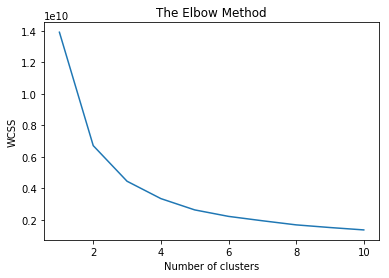

In [15]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### here in the elbow graph it can be noted that the curve smoothens after 5 so the optimum no of cluster=5

In [16]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [17]:
y_kmeans_list=list(y_kmeans)

In [18]:
y_kmeans_set=set(y_kmeans_list)

In [19]:
print("No of clusters : ",y_kmeans_set)

No of clusters :  {0, 1, 2, 3, 4}


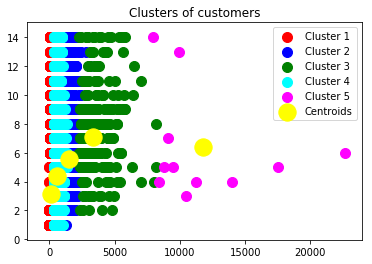

In [20]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.legend()
plt.show()

In [21]:
#y_kmeans

In [22]:
#df_new_copy=df_new.copy()

In [23]:
#df_new_copy["Y_kmeans"]=y_kmeans

In [ ]:
#df_new_copy.head()

In [ ]:
#df_new_copy.to_excel("Clustered Global SuperStore data.xlsx")

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)